In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import ceil

In [27]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [28]:
variable_info = pd.DataFrame({
    'VARIABLE': df.columns,         # Nomes das variáveis
    'TYPE': df.dtypes.astype(str)   # Tipos de dados (dtypes)
})

# Exibir a tabela com as variáveis e seus tipos
print(variable_info)
variable_info.to_excel("variable_description_auto.xlsx", index=False)

                                          VARIABLE     TYPE
customer_id                            customer_id   object
customer_region                    customer_region   object
customer_age                          customer_age  float64
vendor_count                          vendor_count    int64
product_count                        product_count    int64
is_chain                                  is_chain    int64
first_order                            first_order  float64
last_order                              last_order    int64
last_promo                              last_promo   object
payment_method                      payment_method   object
CUI_American                          CUI_American  float64
CUI_Asian                                CUI_Asian  float64
CUI_Beverages                        CUI_Beverages  float64
CUI_Cafe                                  CUI_Cafe  float64
CUI_Chicken Dishes              CUI_Chicken Dishes  float64
CUI_Chinese                            C

In [29]:
df.head(10)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,...,0,0,0,1,0,0,0,0,0,0
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,...,0,1,0,0,0,0,0,0,0,0
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,...,0,0,0,1,0,1,0,0,0,1
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_duplicates = df.duplicated().sum()
df_duplicates
df=df.drop_duplicates()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31875 non-null  object 
 1   customer_region           31875 non-null  object 
 2   customer_age              31148 non-null  float64
 3   vendor_count              31875 non-null  int64  
 4   product_count             31875 non-null  int64  
 5   is_chain                  31875 non-null  int64  
 6   first_order               31769 non-null  float64
 7   last_order                31875 non-null  int64  
 8   last_promo                31875 non-null  object 
 9   payment_method            31875 non-null  object 
 10  CUI_American              31875 non-null  float64
 11  CUI_Asian                 31875 non-null  float64
 12  CUI_Beverages             31875 non-null  float64
 13  CUI_Cafe                  31875 non-null  float64
 14  CUI_Chicken

In [32]:
# Calculation of the number and percentage of missing values per column
missing_values = df.isna().sum()
missing_percentage = round((df.isna().sum() / len(df)) * 100,2)

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_values.sum())
print(missing_data)

1997
                          Missing Values  Percentage
customer_id                            0        0.00
customer_region                        0        0.00
customer_age                         727        2.28
vendor_count                           0        0.00
product_count                          0        0.00
is_chain                               0        0.00
first_order                          106        0.33
last_order                             0        0.00
last_promo                             0        0.00
payment_method                         0        0.00
CUI_American                           0        0.00
CUI_Asian                              0        0.00
CUI_Beverages                          0        0.00
CUI_Cafe                               0        0.00
CUI_Chicken Dishes                     0        0.00
CUI_Chinese                            0        0.00
CUI_Desserts                           0        0.00
CUI_Healthy                            0 

In [33]:
nunique_values = df.apply(lambda col: col.nunique())

unique_values = df.apply(lambda col: col.unique())

unique_data = pd.DataFrame({'Nº unique Values': nunique_values, 'Unique Values': unique_values})
unique_data

,Nº unique Values,Unique Values
customer_id,31875,"[1b8f824d5e, 5d272b9dcb, f6d1b2ba63, 180c632ed..."
customer_region,9,"[2360, 8670, 4660, 2440, -, 4140, 2490, 8370, ..."
customer_age,66,"[18.0, 17.0, 38.0, nan, 20.0, 40.0, 24.0, 27.0..."
vendor_count,37,"[2, 1, 3, 4, 5, 7, 6, 11, 9, 8, 12, 14, 20, 13..."
product_count,93,"[5, 2, 3, 4, 6, 10, 8, 17, 7, 26, 9, 32, 15, 1..."
is_chain,60,"[1, 2, 0, 3, 5, 4, 7, 12, 6, 23, 8, 11, 20, 14..."
first_order,91,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
last_order,91,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
last_promo,4,"[DELIVERY, DISCOUNT, -, FREEBIE]"
payment_method,3,"[DIGI, CASH, CARD]"


In [34]:
df['Total of orders'] = df['HR_0'] + df['HR_1'] + df['HR_2'] + df['HR_3'] + df['HR_4'] + df['HR_5'] + df['HR_6'] + df['HR_7']  \
                      + df['HR_8'] + df['HR_9'] + df['HR_10'] + df['HR_11'] + df['HR_12'] + df['HR_13'] + df['HR_14'] + df['HR_15'] \
                      + df['HR_16']+ df['HR_17'] + df['HR_18'] + df['HR_19'] + df['HR_20'] + df['HR_21'] + df['HR_22'] + df['HR_23']

df = df.drop(columns=[f'HR_{i}' for i in range(24)])

In [35]:
# Have a first look at the numerical variables and their distirbutions
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total of orders
count,31148.000000,31875.000000,31875.000000,31875.000000,31769.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,...,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,30711.000000
mean,27.507545,3.102714,5.668424,2.819357,28.469924,63.672376,4.877205,9.955306,2.298224,0.801490,...,3.910391,0.842040,0.555922,0.567561,0.590933,0.619388,0.677867,0.652957,0.704408,4.257660
std,7.161828,2.771753,6.957933,3.977977,24.104626,23.227992,11.647043,23.561492,8.475868,6.428422,...,15.548367,4.433918,1.013634,1.044190,1.045900,1.069558,1.088284,1.069802,1.167592,4.945954
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,454.450000,136.380000,16.000000,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000,94.000000


In [36]:
# Have a first look at the categorical variables and their distirbutions
df.describe(include='O')

,customer_id,customer_region,last_promo,payment_method
count,31875,31875,31875,31875
unique,31875,9,4,3
top,1b8f824d5e,8670,-,CARD
freq,1,9761,16744,20153


In [37]:
days=["DOW_0","DOW_1","DOW_2","DOW_3","DOW_4","DOW_5","DOW_6"]
sum_per_day=df[days].sum()
sum_per_day

,0
DOW_0,17720
DOW_1,18091
DOW_2,18836
DOW_3,19743
DOW_4,21607
DOW_5,20813
DOW_6,22453


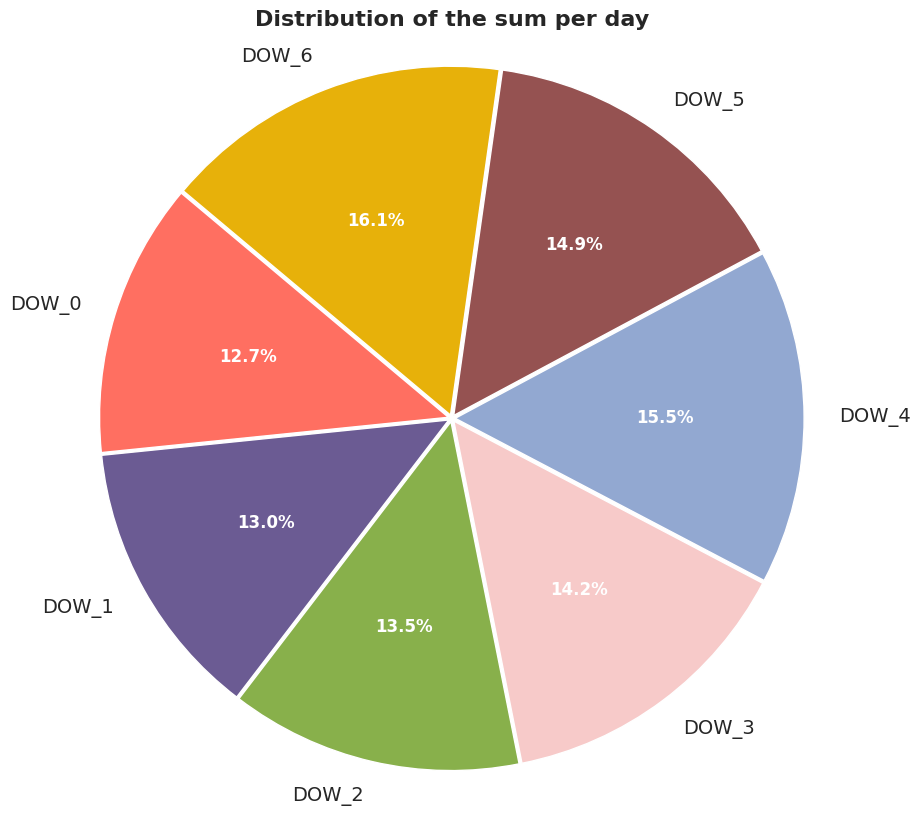

In [38]:
cores = ['#FF6F61', '#6B5B93', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#E7B10A']

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sum_per_day,
    labels=sum_per_day.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    explode=[0.01] * len(cores)
)

plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=14)


plt.title('Distribution of the sum per day', fontsize=16, weight='bold')
plt.axis('equal')


plt.show()

In [39]:
non_metric_features = ["customer_id","customer_region","last_promo","payment_method"]
metric_features = df.columns.drop(non_metric_features).to_list()

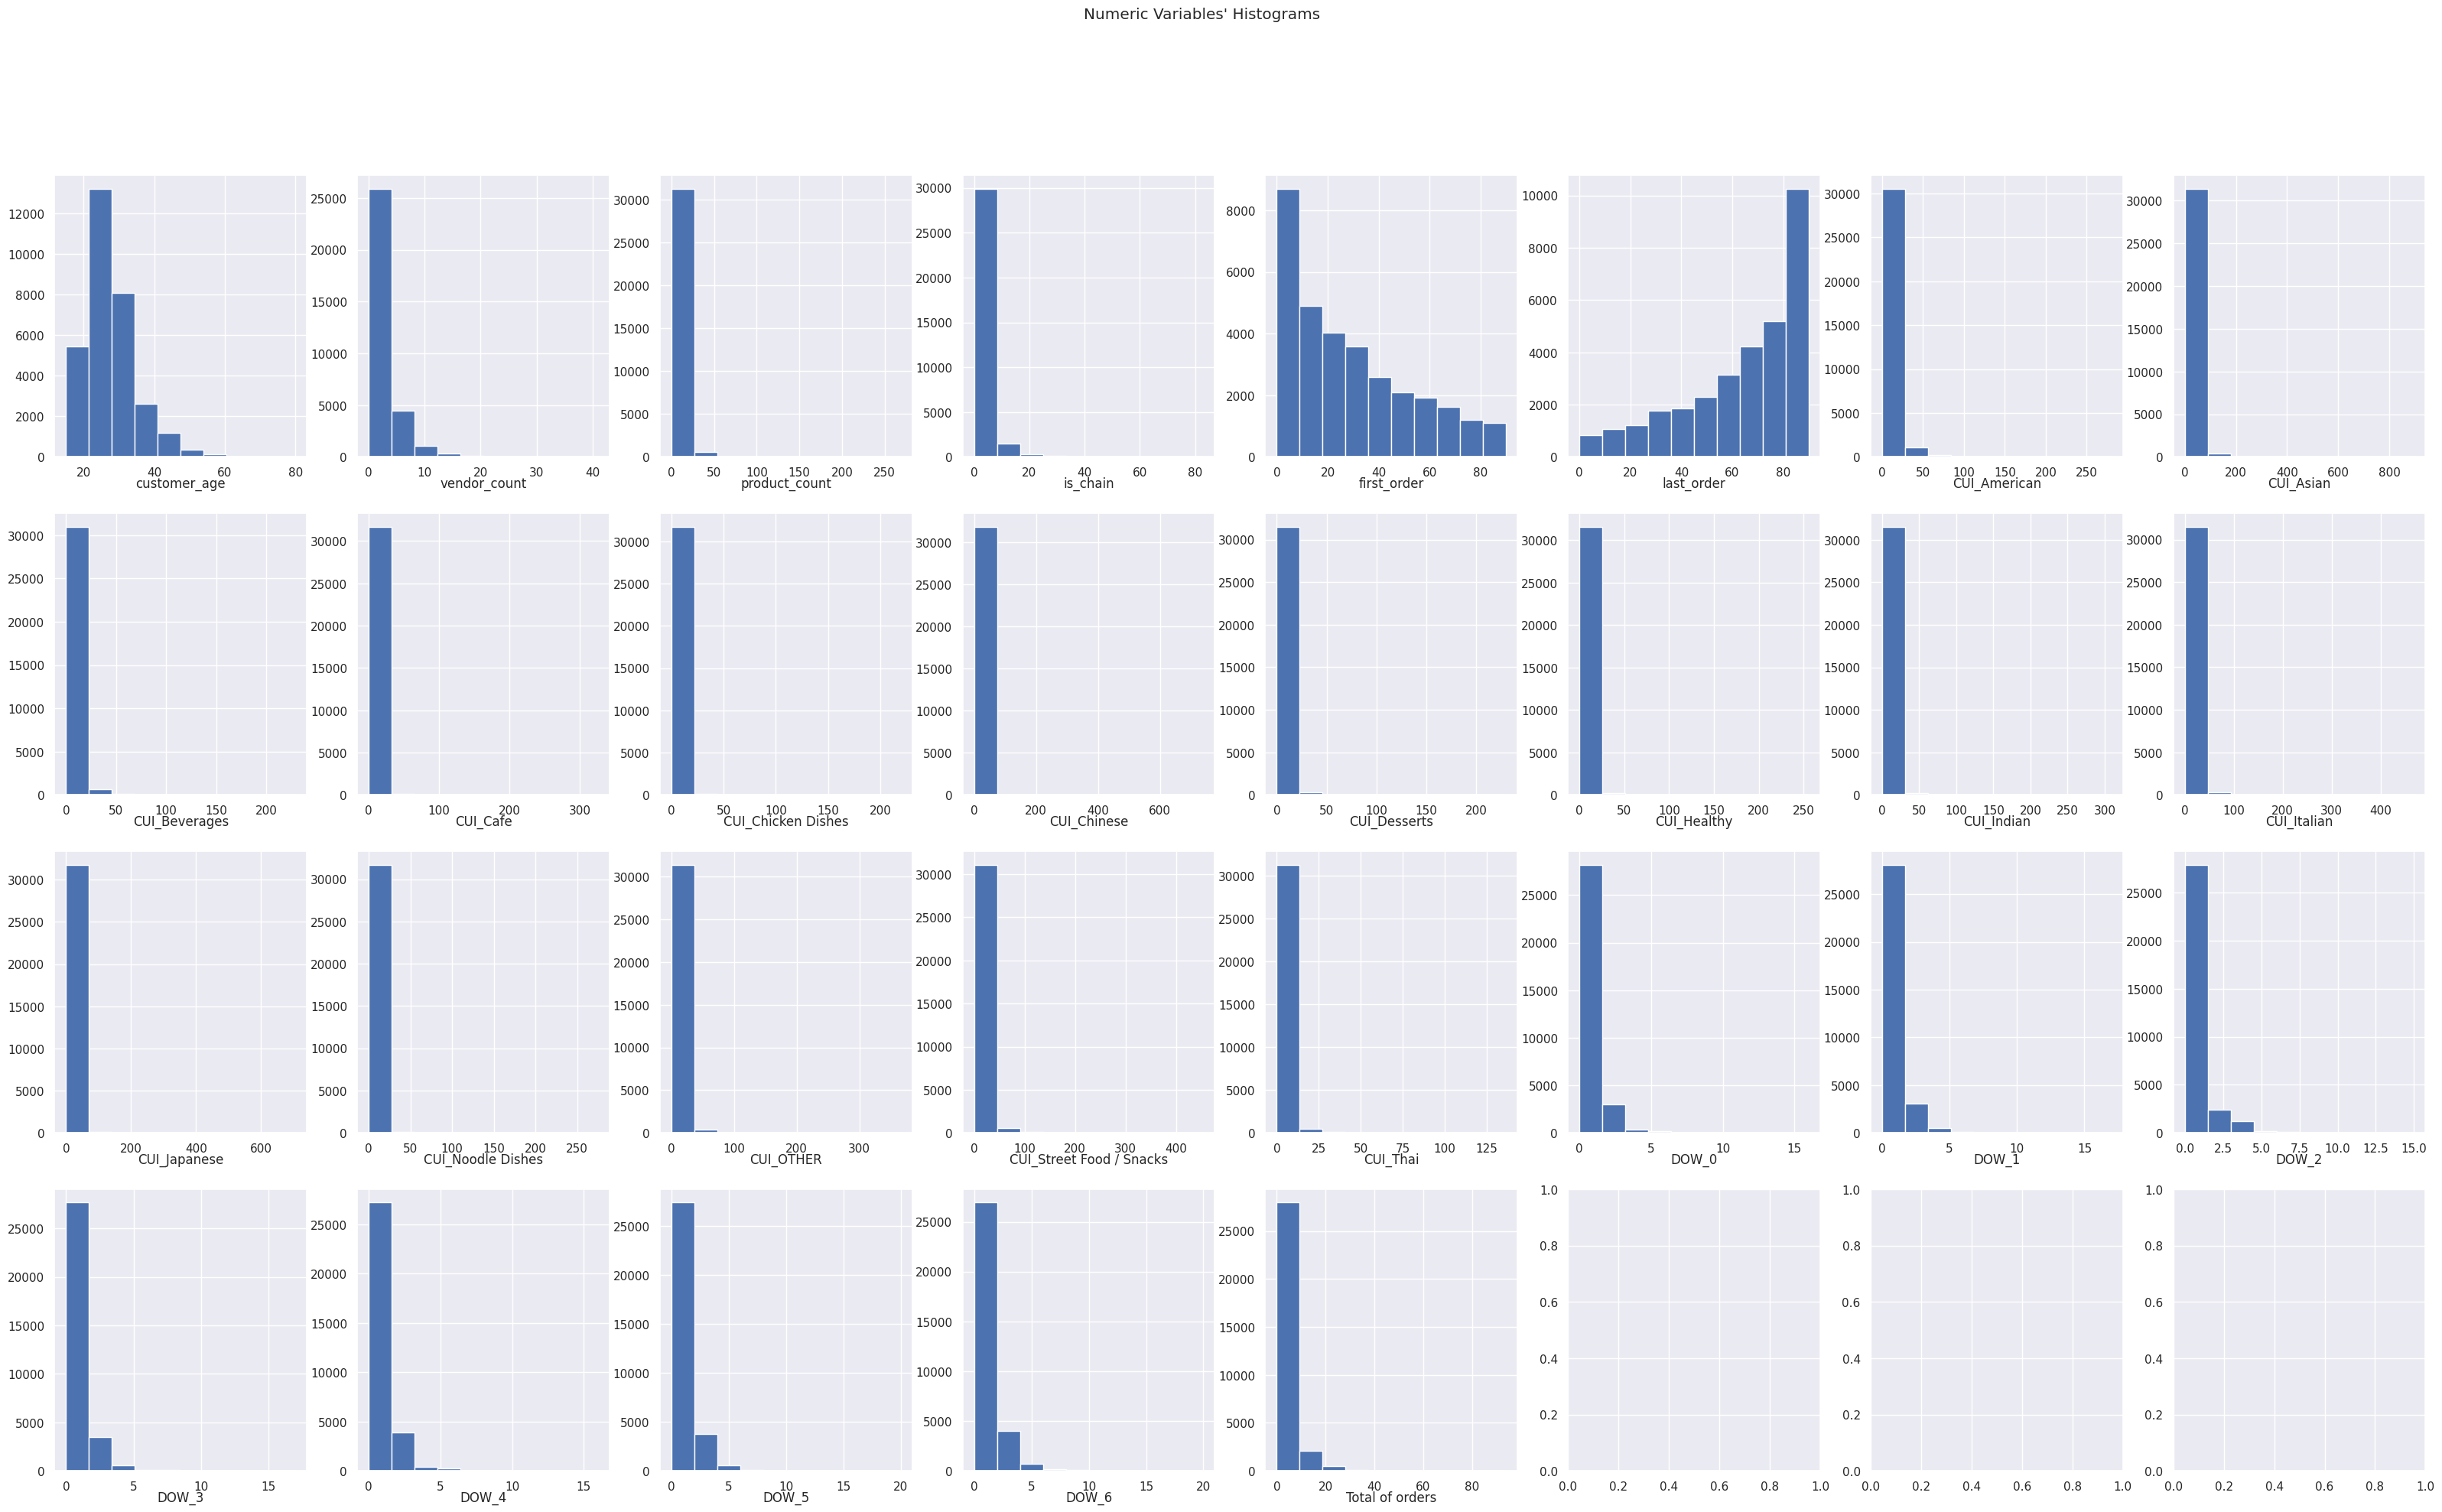

In [40]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

sp_rows = 4
sp_cols = 8


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(40, 22))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))

plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

In [41]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0


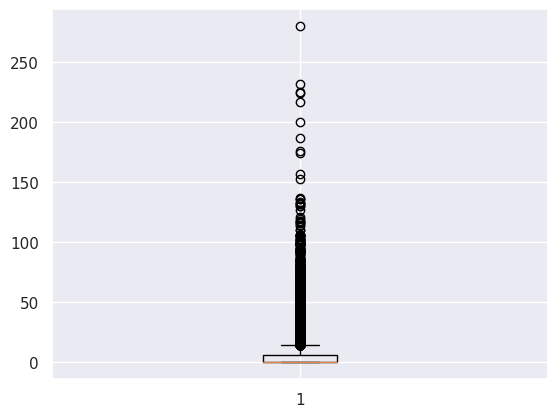

In [43]:
plt.boxplot(df['CUI_American'].dropna())
plt.show()

In [52]:
for col in df.loc[:,'CUI_American':'CUI_Thai'].columns:
    df[col] = df[col].replace(0, np.nan)


KeyError: 'Total of orders'

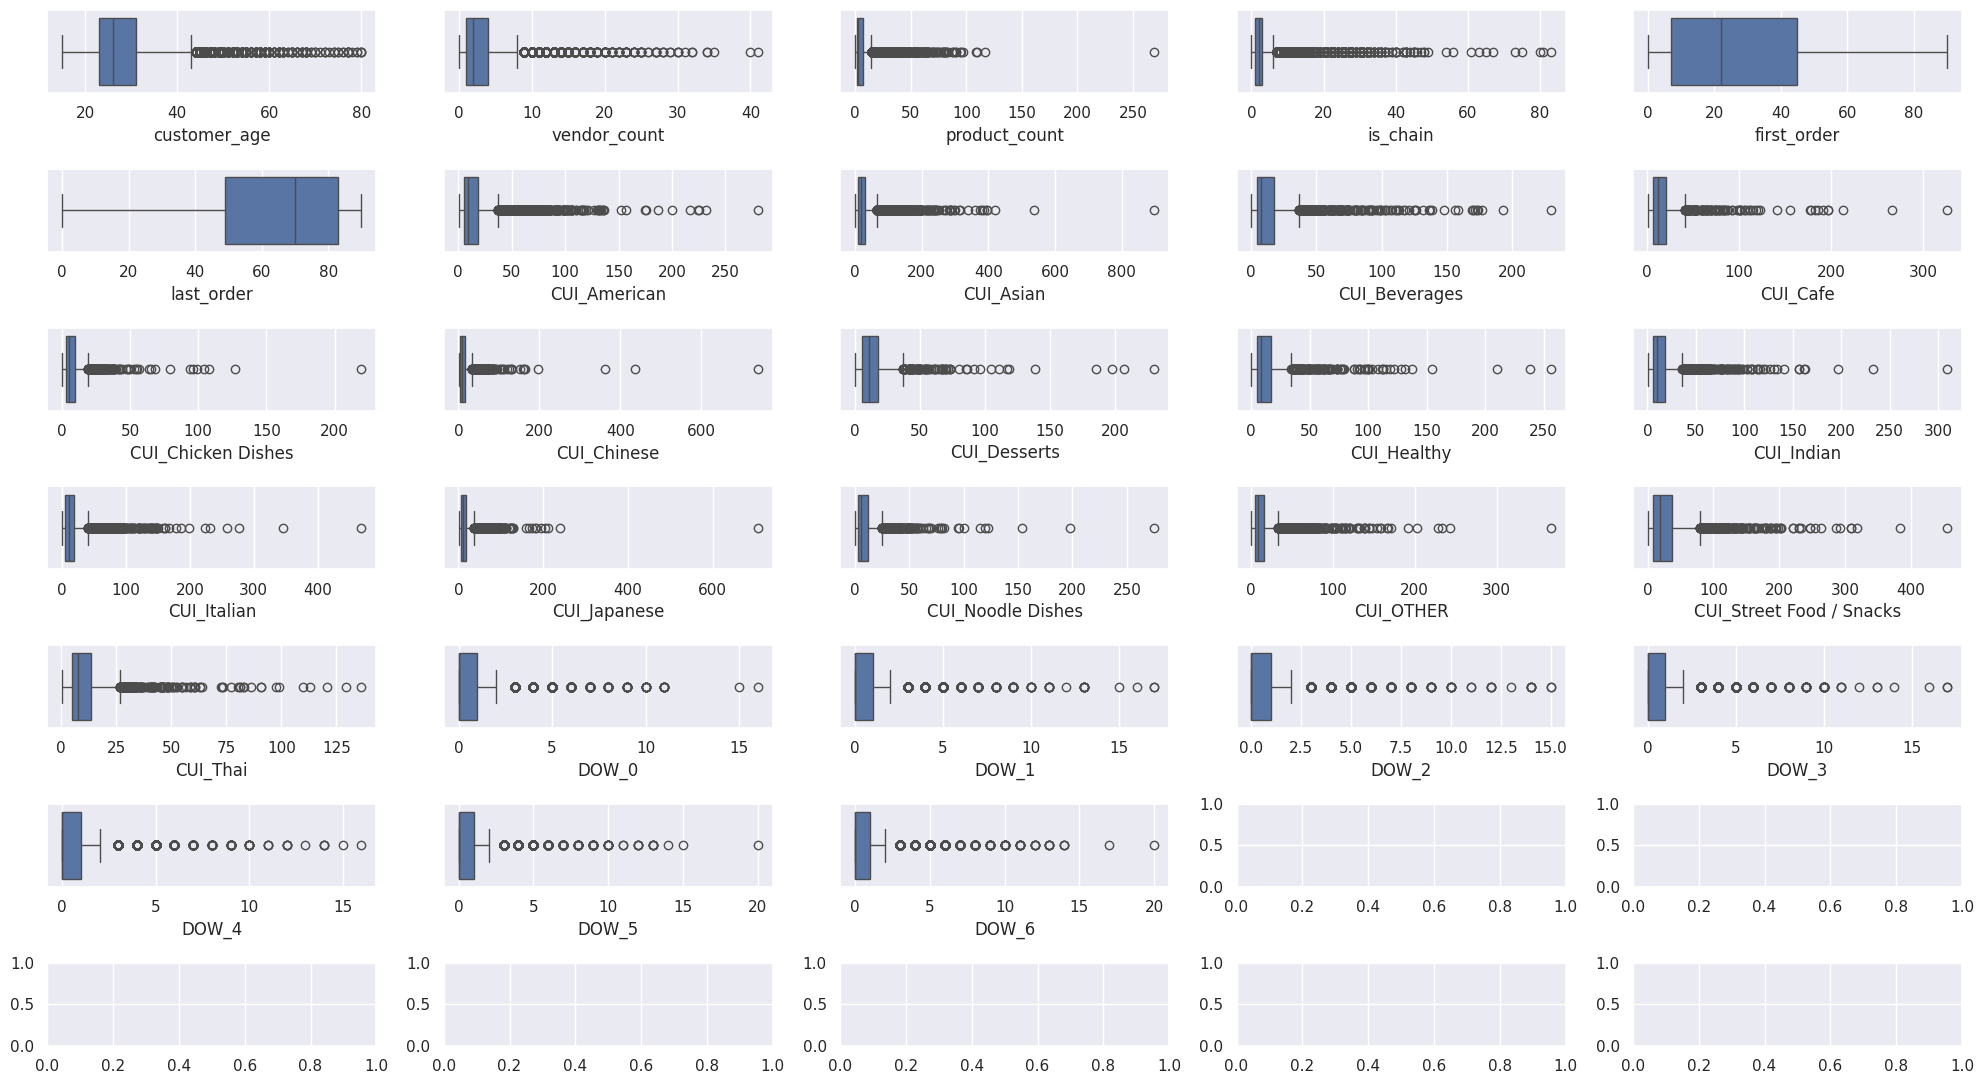

In [53]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 7
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

plt.show()